We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Sarah\Documents\DAFT_NOV_21_01\module_2\Lab_21_Time_Series_Models\airlines_passengers.csv")

Let’s display the first five rows of data

In [2]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [3]:
data[-5:]

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [4]:
data['Month']=pd.to_datetime(data['Month'])
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


The next thing we can do is convert the month column to an index. 


In [5]:
data.index=data['Month']
data.drop(['Month'], axis=1)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

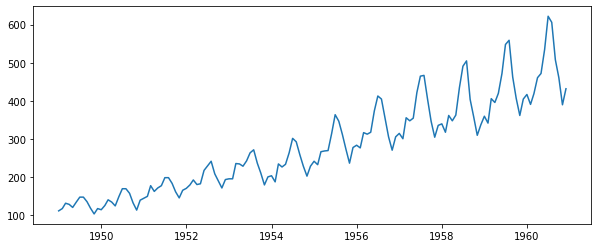

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,4))
Plot1 = fig.add_subplot(111)  #111 = position row 1 column 1 only 1 plot 
Plot1.plot(data['Passengers'])
plt.show()


Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [7]:
from statsmodels.tsa.stattools import adfuller


Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [8]:
ad_fuller_result = adfuller(data['Passengers'], autolag = 'AIC')
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060502
p-value: 0.991880243437641


Store our results in a dataframe display it

In [9]:
results = pd.DataFrame({'ADF Statistic': ad_fuller_result[0], 'p-value':ad_fuller_result[1]}, index=[0])
results

,ADF Statistic,p-value
0,0.815369,0.99188


Explain the results

In [10]:
#P value higher than 0.05 so the H0 hypothesis is accepted. The time series it not stationary

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

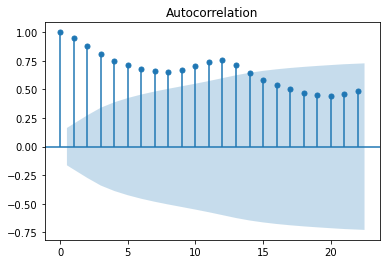

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
# Calculate the ACF (via statsmodel)
plot_acf(data['Passengers'])
# Show the data as a plot (via matplotlib)
plt.show()

Calculate partial autocorrelation

C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


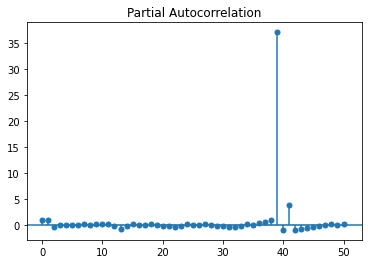

In [12]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(data['Passengers'], alpha =0.05, lags=50)
plt.show()


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


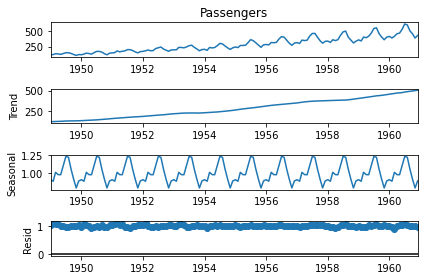

In [14]:
result = seasonal_decompose(data['Passengers'], model='multiplicative', extrapolate_trend='freq')
decompose = result.plot() 
plt.show()


Can you describe the charts?
#there is a clear seasonality and increasing trend

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [22]:
# making the data stationary 
data['Difference'] = data['Passengers'].diff()
data = data.dropna()


In [16]:
result = adfuller(data.Difference.dropna()) #does not work with na data so drop 
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])
# pvalue exactly 0.05 so time series is now stationary 

(-2.829266824170006, 0.05421329028382468, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)
ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


In [23]:
data['Difference'].dropna(inplace=True)

C:\Users\Sarah\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [24]:
data['Difference'].isnull().sum()

0

MA(1)

In [26]:
import statsmodels.tsa.api as tsa

train_model = tsa.ARMA(data['Difference'], order=(0, 1)).fit()


C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [29]:
forecast = train_model.predict(data.Difference.index[-10], data.Difference.index[-1])
forecast

C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1960-03-01    -6.896351
1960-04-01    16.421426
1960-05-01    12.683277
1960-06-01     1.746240
1960-07-01    26.995615
1960-08-01    26.494385
1960-09-01   -14.626552
1960-10-01   -31.026606
1960-11-01    -3.986736
1960-12-01   -24.463151
Freq: MS, dtype: float64

MA(2)

In [31]:
train_model2 = tsa.ARMA(data['Difference'], order=(0, 2)).fit()


C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [33]:
forecast2 = train_model2.predict(data.Difference.index[-10],data.Difference.index[-1])
forecast2

1960-03-01     7.454080
1960-04-01    11.542176
1960-05-01     7.995127
1960-06-01    -5.065430
1960-07-01    27.008329
1960-08-01     5.577536
1960-09-01   -22.607515
1960-10-01   -19.622680
1960-11-01    13.545292
1960-12-01   -21.400142
Freq: MS, dtype: float64

In [41]:
data.tail(10)

,Month,Passengers,Difference
Month,,,
1960-03-01,1960-03-01,419,28.0
1960-04-01,1960-04-01,461,42.0
1960-05-01,1960-05-01,472,11.0
1960-06-01,1960-06-01,535,63.0
1960-07-01,1960-07-01,622,87.0
1960-08-01,1960-08-01,606,-16.0
1960-09-01,1960-09-01,508,-98.0
1960-10-01,1960-10-01,461,-47.0
1960-11-01,1960-11-01,390,-71.0


AR(2)

In [34]:
train_model3 = tsa.ARMA(data['Difference'], order=(2,0)).fit()
forecast3 = train_model3.predict(data.Difference.index[-15], data.Difference.index[-1])
forecast3

C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1959-10-01   -36.893922
1959-11-01     3.036714
1959-12-01    -2.050032
1960-01-01    28.770733
1960-02-01    -3.350064
1960-03-01   -10.583750
1960-04-01    18.685899
1960-05-01    11.496501
1960-06-01    -3.497791
1960-07-01    23.393452
1960-08-01    20.458591
1960-09-01   -24.150036
1960-10-01   -31.403394
1960-11-01     6.912086
1960-12-01   -13.991298
Freq: MS, dtype: float64

ARMA (?,?)

In [65]:
train_model4 = tsa.ARMA(data['Difference'], order=(2,1)).fit()


C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Display the output

In [66]:
forecast4 = train_model4.predict(data.Difference.index[-10], data.Difference.index[-1])
forecast4

C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1960-03-01     8.661196
1960-04-01    26.077198
1960-05-01    17.366549
1960-06-01    -1.884538
1960-07-01     0.622754
1960-08-01   -20.756332
1960-09-01   -65.709152
1960-10-01   -66.905113
1960-11-01   -20.564846
1960-12-01    -3.247451
Freq: MS, dtype: float64

ARIMA(?,?)

In [73]:
from statsmodels.tsa.arima.model import ARIMA

train_model5 = ARIMA(data['Difference'], order=(2,1,1)).fit()


C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [128]:
train_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Difference   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -692.943
Date:                Wed, 19 Jan 2022   AIC                           1393.887
Time:                        13:09:02   BIC                           1405.710
Sample:                    02-01-1949   HQIC                          1398.691
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3845      0.092      4.195      0.000       0.205       0.564
ar.L2         -0.2259      0.071     -3.182      0.001      -0.365      -0.087
ma.L1         -0.9987      0.675     -1.480      0.139      -2.321       0.324
sigma2       981.3046    690.760      1.421      0.155    -372.560    2335.169
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.64   Prob(JB):                         0.77
Heteroskedasticity (H):               8.22   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Display the output

In [74]:
forecast5 = train_model5.predict(data.Difference.index[-10], data.Difference.index[-1])
forecast5

1960-03-01   -11.012426
1960-04-01    18.631061
1960-05-01    11.991457
1960-06-01    -3.099145
1960-07-01    24.387711
1960-08-01    22.329294
1960-09-01   -22.978761
1960-10-01   -31.786364
1960-11-01     6.239167
1960-12-01   -15.061035
Freq: MS, Name: predicted_mean, dtype: float64

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [129]:
from statsmodels.tools.eval_measures import rmse

In [130]:
print(rmse(forecast,data['Difference'].tail(10)))
print(rmse(forecast2,data['Difference'].tail(10)))
print(rmse(forecast3,data['Difference'].tail(10)))
print(rmse(forecast4,data['Difference'].tail(10)))
print(rmse(forecast5,data['Difference'].tail(10)))

52.10334276867972
52.59027029389531
42.88550046104266
42.88550046104266
51.873964307509745


The RMSE is the square root of the variance of the residuals.
Here we can say that the models ARMA(2,0) and ARMA(2,1) are the best fit since their predicted values are close by +/- 42.8 to the real values which is the least available difference

Calculate AIC

In [131]:
import statsmodels.api as sm

In [132]:
data

,Month,Passengers,Difference
Month,,,
1949-02-01,1949-02-01,118,6.0
1949-03-01,1949-03-01,132,14.0
1949-04-01,1949-04-01,129,-3.0
1949-05-01,1949-05-01,121,-8.0
1949-06-01,1949-06-01,135,14.0
...,...,...,...
1960-08-01,1960-08-01,606,-16.0
1960-09-01,1960-09-01,508,-98.0
1960-10-01,1960-10-01,461,-47.0


In [133]:
rmse=(rmse(forecast4,data['Difference'].tail(10)))
rmse

42.88550046104266

In [136]:
from statsmodels.tools.eval_measures import aic
train_model4.aic

1361.6958105176711